[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-Deep-Learning-Hands-on-NOC24EE04-/blob/main/week3/KNN_SVM.ipynb)

# **Import necessary libraries**

In [1]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# **Loading CIFAR-10 Dataset**

### **Visualize the dataset**

170498071/170498071 [==============================] - 6s 0us/step


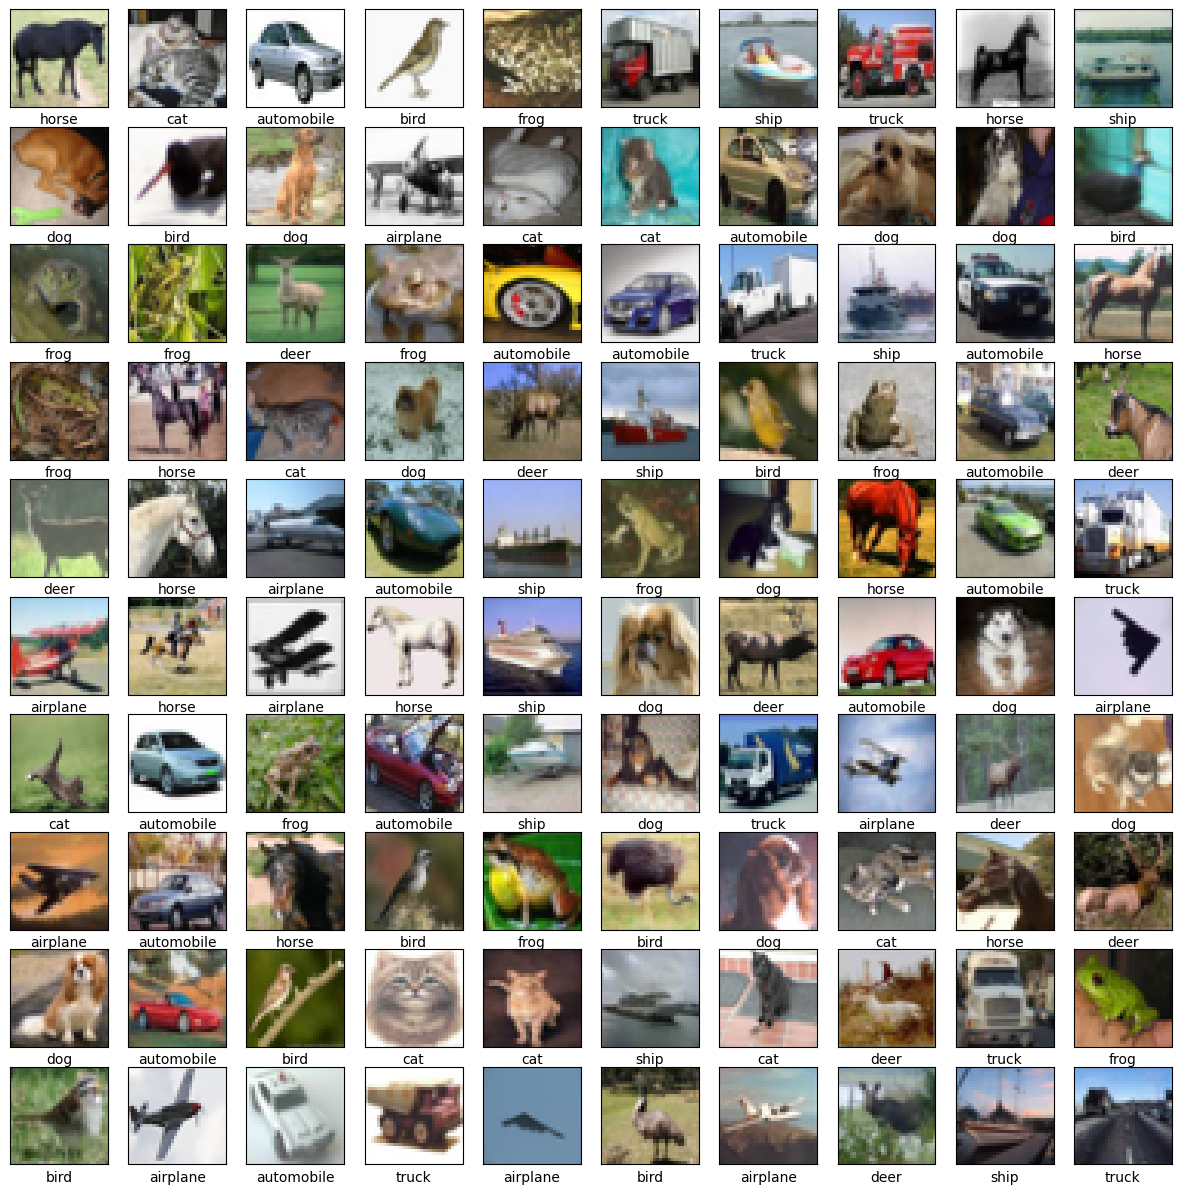

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# Define class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display a grid of images
def display_images(images, labels, class_names, num_images=100):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(10, 10, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display 100 random images
indices = np.random.choice(len(x_train), 100, replace=False)
display_images(x_train[indices], y_train[indices], class_names)

### **Load and reshape to (N_train, 3072), where 3072=32x32x3 and then pre-precess the data in the range to [0,1]**

In [3]:
def load_cifar10():
    # Load CIFAR-10 dataset
    cifar10 = tf.keras.datasets.cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    return x_train, y_train, x_test, y_test

def preprocess_data(x_train, x_test):
    # Normalize data
    x_train = x_train.astype(float) / 255.0
    x_test = x_test.astype(float) / 255.0
    return x_train, x_test

x_train, y_train, x_test, y_test = load_cifar10()
x_train, x_test = preprocess_data(x_train, x_test)

print('Shape of training image set: '+str(x_train.shape))
print('Shape of training label:     '+str(y_train.shape))
print('Shape of testing image set:  '+str(x_test.shape))
print('Shape of testing label:      '+str(y_test.shape))

Shape of training image set: (50000, 3072)
Shape of training label:     (50000, 1)
Shape of testing image set:  (10000, 3072)
Shape of testing label:      (10000, 1)


# **Define KNN classifier**

In [4]:
def euclidean_distance(x1, x2):
    # Compute Euclidean distance between two points
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [5]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        predictions = []
        total_test_samples = len(x_test)

        for i, x in enumerate(x_test):
            # Compute distances between x and all examples in the training set
            distances = [euclidean_distance(x, x_train) for x_train in self.x_train]

            # Sort by distance and return indices of the first k neighbors
            k_indices = np.argsort(distances)[:self.k]

            # Extract the labels of the k nearest neighbor training samples
            k_nearest_labels = [tuple(self.y_train[i]) for i in k_indices]

            # Return the most common class label
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])

            # Print progress
            if (i + 1) % 100 == 0 or (i + 1) == total_test_samples:
                print(f"Progress: {i + 1}/{total_test_samples} samples processed")

        return np.array(predictions)

# **Fit KNN and check the accuracy**

In [ ]:
# Initialize and train the KNN classifier
knn = KNN(k=5)
knn.fit(x_train, y_train)

x_test=x_test[0:400,:];
y_test=y_test[0:400]
# Predict
y_pred = knn.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# **KNN using Sk-learn libraray**

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the data
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Normalize the data
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict
y_pred = knn.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.3303


### **Lets check for MNIST dataset**

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

# Predict
y_pred = knn.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


11490434/11490434 [==============================] - 1s 0us/step
Accuracy: 0.9682


# **Support vector machine: Linear Machine**

### **MNIST Dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(10, 784)


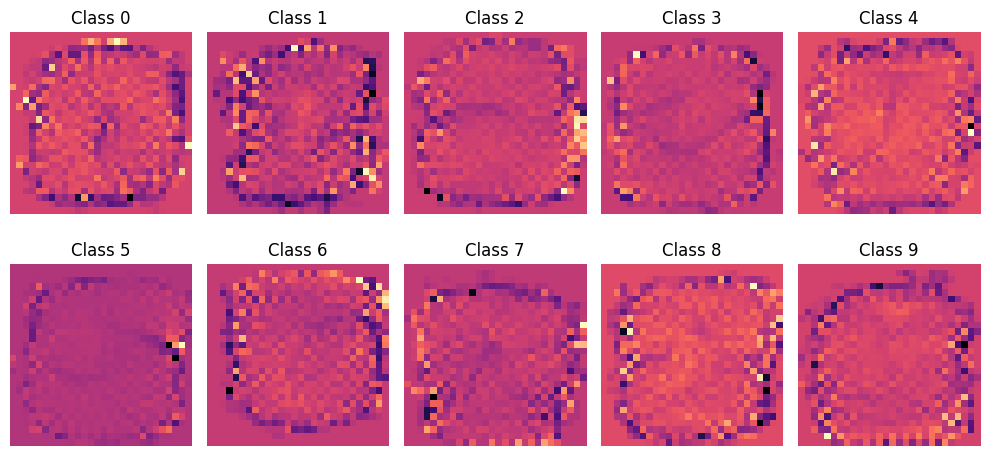

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values to range [0, 1]
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

svm = LinearSVC()
svm.fit(x_train, y_train)

coef = svm.coef_
print(coef.shape)

import matplotlib.pyplot as plt

# Reshape coefficients to match the original image shape
coefficients_reshaped = coef.reshape(10, 28, 28)

# Plot the coefficients as images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(coefficients_reshaped[i], cmap='magma')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
y_pred = svm.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9182


### **CIFAR-10 dataset (WARNING IT WILL TAKE MORE THAN THREE HOURS TO TRAIN)...Train at your own risk  LOL!!!**

In [ ]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Normalize pixel values to range [0, 1]
x_train_flat = x_train_flat.astype(float) / 255.0
x_test_flat = x_test_flat.astype(float) / 255.0

y_train = y_train.ravel()

In [ ]:
svm = LinearSVC()
svm.fit(x_train_flat, y_train)

In [ ]:

coef = svm.coef_
print(coef.shape)

import matplotlib.pyplot as plt

# Reshape coefficients to match the original image shape
coefficients_reshaped = coef.reshape(10,32,32,3)

# Plot the coefficients as images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(coefficients_reshaped[i], cmap='magma')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()